In [1]:
import librosa as lr
import librosa.display as lrd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

from pink_noise import powerlaw_psd_gaussian

In [67]:
x, sr = lr.load('/data/riccardo_datasets/npr_news/train/newscast230841.wav', sr=None, duration=10, offset=2)
s = np.abs(lr.stft(x))

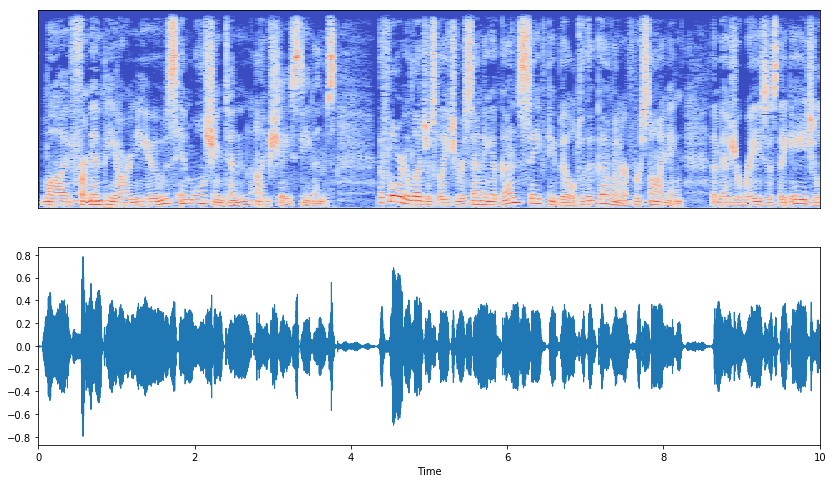

In [69]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s))
plt.subplot(212)
lrd.waveplot(x, sr=sr)
ipd.Audio(x, rate=sr)

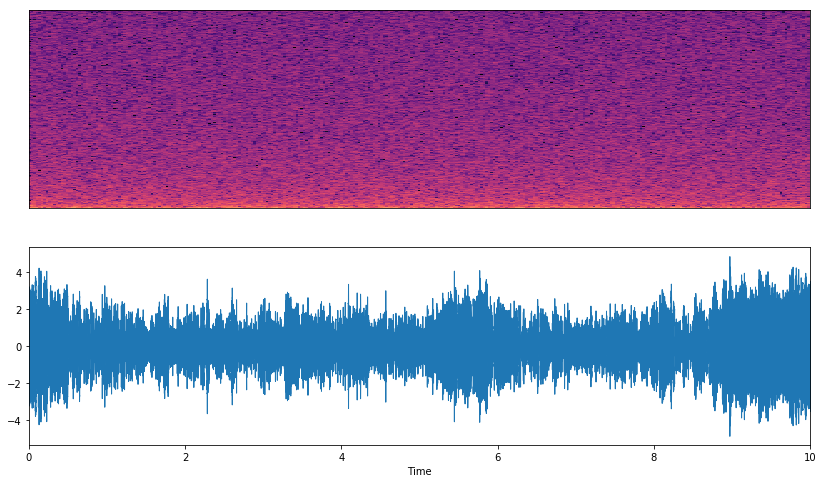

In [70]:
n = powerlaw_psd_gaussian(1, len(x))
s_noise = np.abs(lr.stft(n))

plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s_noise))
plt.subplot(212)
lrd.waveplot(n, sr=sr)
ipd.Audio(n, rate=sr)

In [82]:
SNR_dB = 10
snr = 10.0**(SNR_dB/10.0)

# calculate scaling factor for noise
x_rms = x.std()
n_rms = n.std()
scaling = x_rms / (snr * n_rms)
print(x_rms, n_rms, scaling)
noise = (n * scaling)

# sum scaled signals
noisyx = x + noise

s_noisyx = np.abs(lr.stft(noisyx))

0.11943477 1.0612959882318134 0.011253671717950416


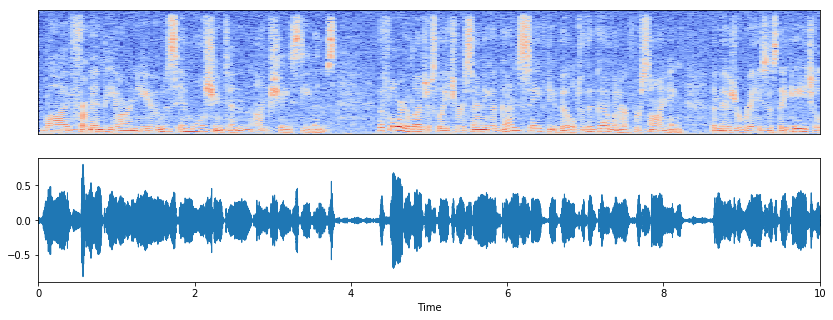

In [83]:
plt.figure(figsize=(14, 5))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s_noisyx))
plt.subplot(212)
lrd.waveplot(noisyx, sr=sr)
ipd.Audio(noisyx, rate=sr)

In [79]:
10 * np.log10((noisyx.std() - noise.std())/noise.std())

-5.560681598353323

0.1690519607598643